# Player Boxplots
Create boxplots by player for total_hands, total_hands_won, and hands_won_percentage

### import library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### import data

In [11]:
df = pd.read_csv('df_summary.csv')
df.head(1)

,player,total_games,total_hands,total_hands_won,total_games_won,hands_mean,hands_min,hands_25%,hands_50%,hands_75%,hands_max,hands_won_mean,hands_won_min,hands_won_25%,hands_won_50%,hands_won_75%,hands_won_max
0,Bill,47,6666,1167,25,141.829787,29.0,113.5,148.0,169.5,234.0,24.829787,7.0,17.0,24.0,29.5,51.0


In [39]:
df_raw = pd.read_csv('total_hands_summary.csv', index_col=0)
df_raw.head(1)

,player,game,total_hands,total_hands_won
0,Eddie,30,79,16


In [33]:
#df_raw.groupby('player').describe()

### explore

Need to use raw data, because cleaned summary data is not enough for boxplot and it makes min/max outliers.

In [36]:
df_Eddie = df_raw[df_raw['player']=='Eddie']
df_Eddie.head()

,player,game,total_hands,total_hands_won
0,Eddie,30,79,16
1,Eddie,31,72,14
2,Eddie,32,94,16
3,Eddie,33,87,12
4,Eddie,34,79,12


{'whiskers': [<matplotlib.lines.Line2D at 0x127742ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1277506a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x127742c70>],
 'medians': [<matplotlib.lines.Line2D at 0x127750d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x127742c10>],
 'means': []}

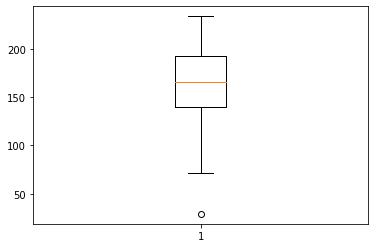

In [37]:
plt.boxplot(df_Eddie['total_hands'])

In [ ]:
# sorted by total games played (as in doc)
players = ['Pluribus', 'ORen', 'MrWhite', 'MrPink', 'MrOrange', 'MrBrown', 'MrBlue',
          'MrBlonde', 'Joe', 'Gogo', 'Hattori', 'Eddie', 'Budd', 'Bill']

### plot total_hands

In [66]:
total_hands_data = []
for player in players:
    df_player = df_raw[df_raw['player']==player]
    total_hands_data.append(df_player['total_hands'])

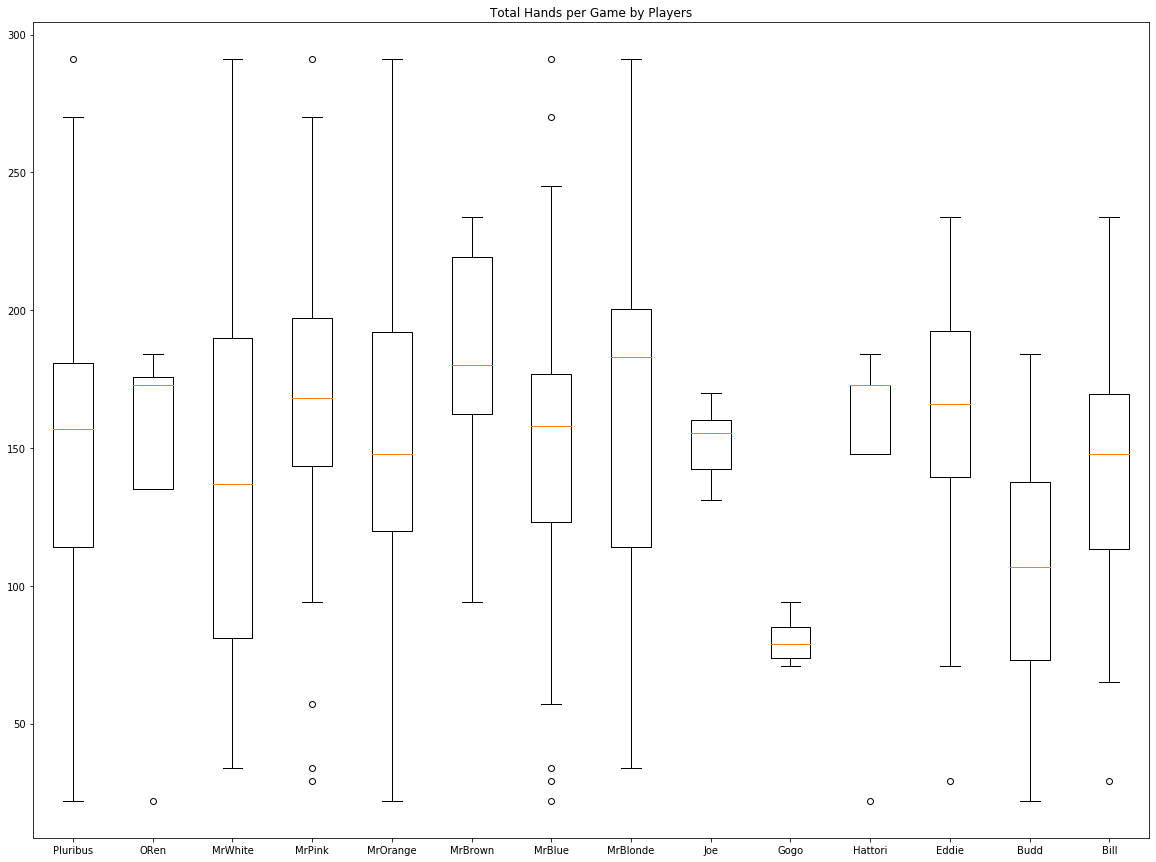

In [68]:
plt.figure(figsize=(20,15))
plt.boxplot(total_hands_data)
plt.xticks(np.arange(1,15),players)
plt.title('Total Hands per Game by Players')
plt.savefig(f'player_boxplots/total_hands.png')

### plot total_hands_won

In [70]:
total_hands_won_data = []
for player in players:
    df_player = df_raw[df_raw['player']==player]
    total_hands_won_data.append(df_player['total_hands_won'])

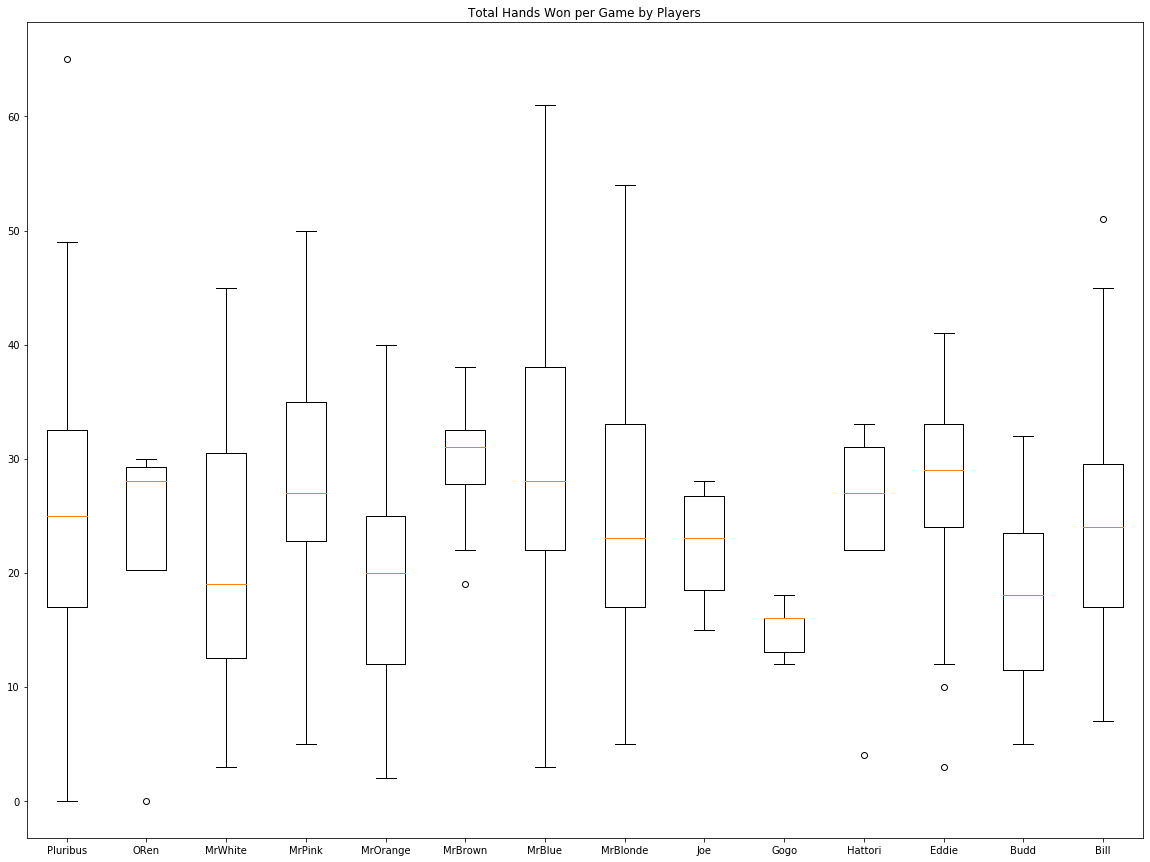

In [71]:
plt.figure(figsize=(20,15))
plt.boxplot(total_hands_won_data)
plt.xticks(np.arange(1,15),players)
plt.title('Total Hands Won per Game by Players')
plt.savefig(f'player_boxplots/total_hands_won.png')

### plot hands_won_percentage

In [72]:
hands_won_percentage_data = []
for player in players:
    df_player = df_raw[df_raw['player']==player]
    hands_won_percentage_data.append(df_player['total_hands_won']/df_player['total_hands'])

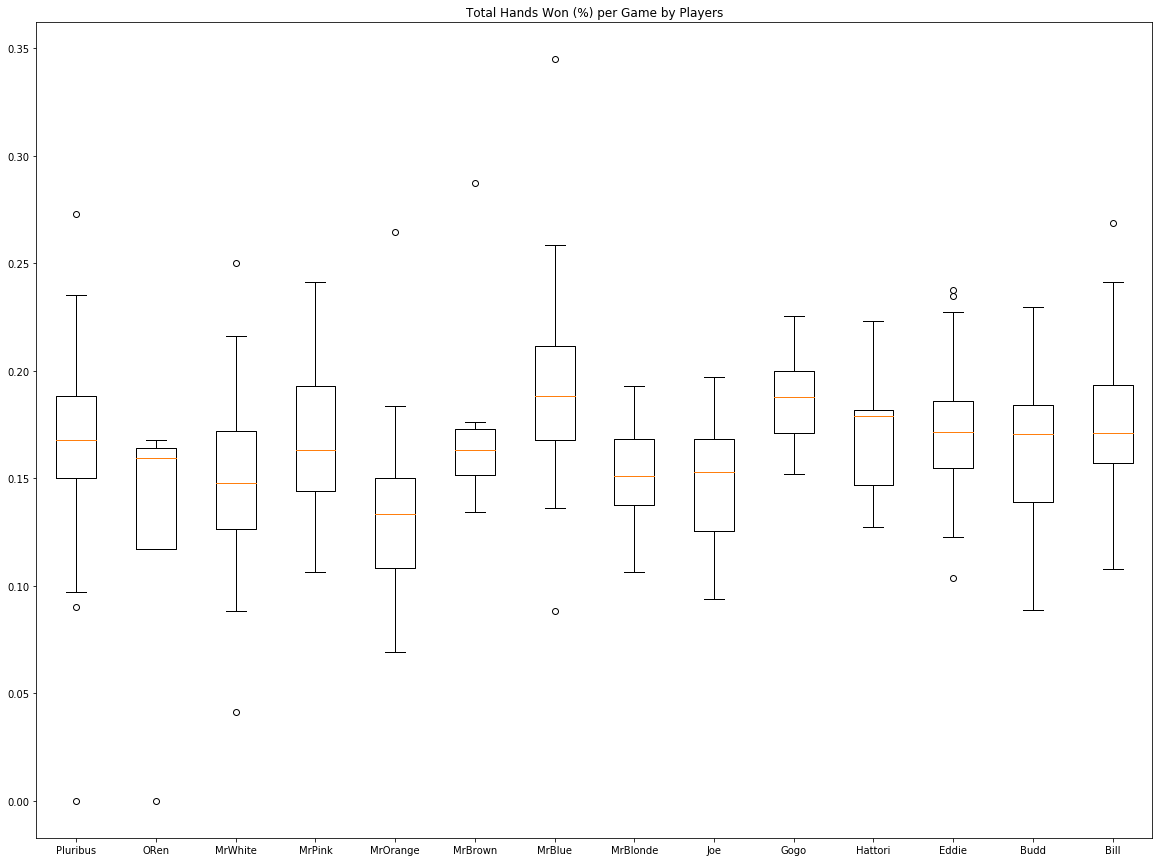

In [74]:
plt.figure(figsize=(20,15))
plt.boxplot(hands_won_percentage_data)
plt.xticks(np.arange(1,15),players)
plt.title('Total Hands Won (%) per Game by Players')
plt.savefig(f'player_boxplots/hands_won_percent.png')